# 1. 数据加载与预处理

In [1]:
import pandas as pd

# 加载数据集
df = pd.read_csv('spotify_tracks.csv')

# 查看数据概况
print(df.info())

# 将缺失值 -1 替换为 NaN
df = df.replace(-1, pd.NA)

# 查看数据的一部分，确认加载是否正确
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62317 entries, 0 to 62316
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          62317 non-null  object 
 1   track_name        62317 non-null  object 
 2   artist_name       62317 non-null  object 
 3   year              62317 non-null  int64  
 4   popularity        62317 non-null  int64  
 5   artwork_url       62317 non-null  object 
 6   album_name        62317 non-null  object 
 7   acousticness      62317 non-null  float64
 8   danceability      62317 non-null  float64
 9   duration_ms       62317 non-null  float64
 10  energy            62317 non-null  float64
 11  instrumentalness  62317 non-null  float64
 12  key               62317 non-null  float64
 13  liveness          62317 non-null  float64
 14  loudness          62317 non-null  float64
 15  mode              62317 non-null  float64
 16  speechiness       62317 non-null  float6

# 2. 音频目标分析

## 2.1 K-means聚类分析 

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 选择用于聚类的音频特征
features = ['danceability', 'energy', 'valence', 'acousticness', 'loudness', 'speechiness']
df_features = df[features].dropna()  # 删除缺失值

# 更新 df 以仅包含没有缺失值的行
df = df.loc[df_features.index]

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)

# 使用 KMeans 聚类
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# 查看聚类结果
print(df[['track_name', 'cluster']].head())

c:\Users\avawa\.conda\envs\py38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


                                   track_name  cluster
0                  Leo Das Entry (From "Leo")        1
1                                AAO KILLELLE        1
2      Mayakiriye Sirikiriye - Orchestral EDM        3
3    Scene Ah Scene Ah - Experimental EDM Mix        0
4  Gundellonaa X I Am A Disco Dancer - Mashup        1


## 2.2 PCA降维可视化结果

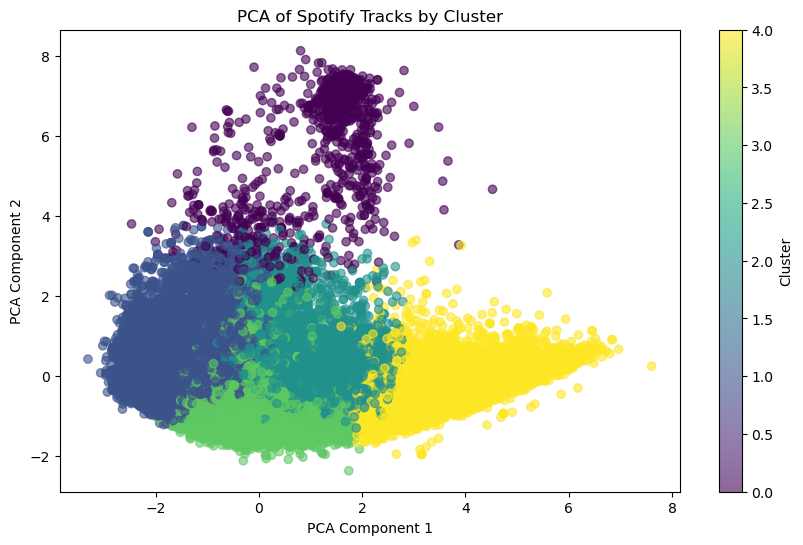

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA 降维
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# 可视化聚类结果
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['cluster'], cmap='viridis', alpha=0.6)
plt.title('PCA of Spotify Tracks by Cluster')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# 3. 文化音乐研究（不同语言的音频特征对比）

## 3.1 不同语言的音频特征分布

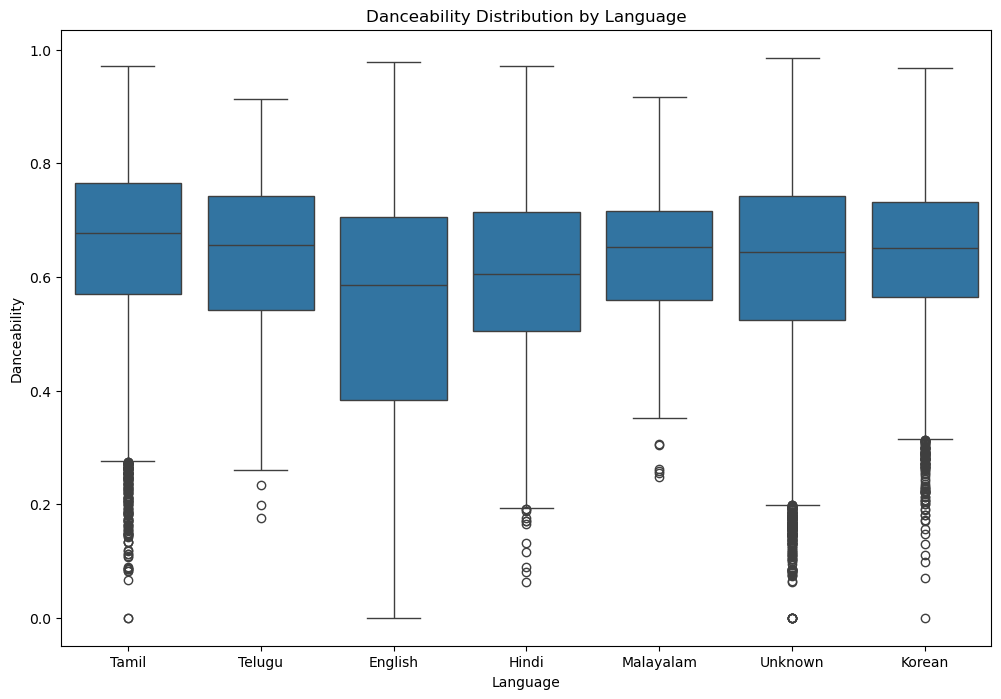

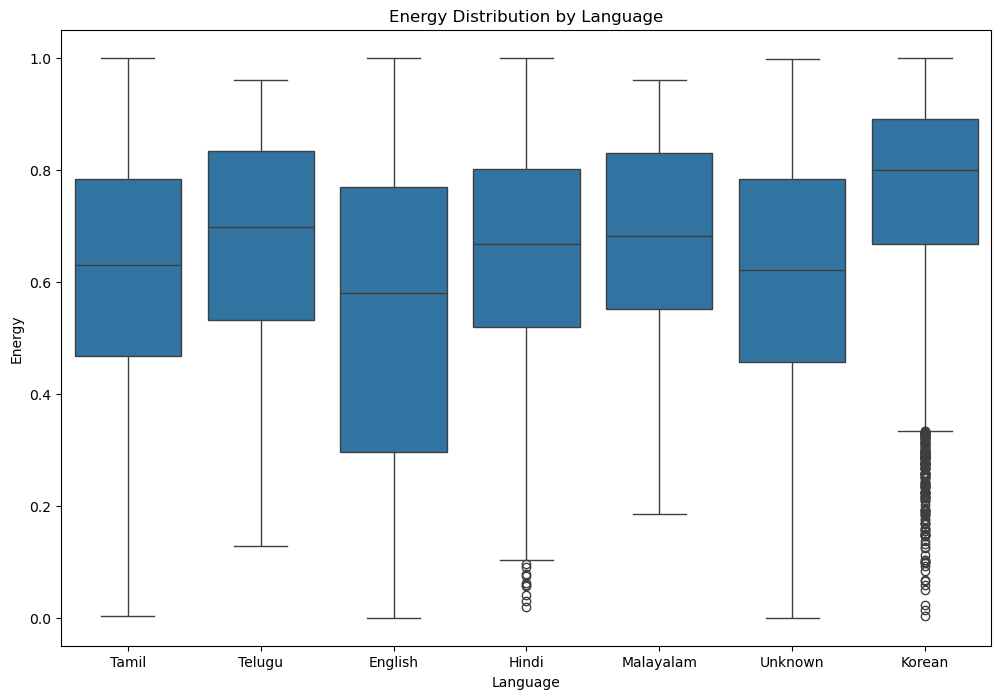

In [5]:
import seaborn as sns

# 可视化不同语言的舞蹈性分布
plt.figure(figsize=(12, 8))
sns.boxplot(x='language', y='danceability', data=df)
plt.title('Danceability Distribution by Language')
plt.xlabel('Language')
plt.ylabel('Danceability')
plt.show()

# 可视化不同语言的能量分布
plt.figure(figsize=(12, 8))
sns.boxplot(x='language', y='energy', data=df)
plt.title('Energy Distribution by Language')
plt.xlabel('Language')
plt.ylabel('Energy')
plt.show()

## 3.2 不同语言与流行度和情绪的关系

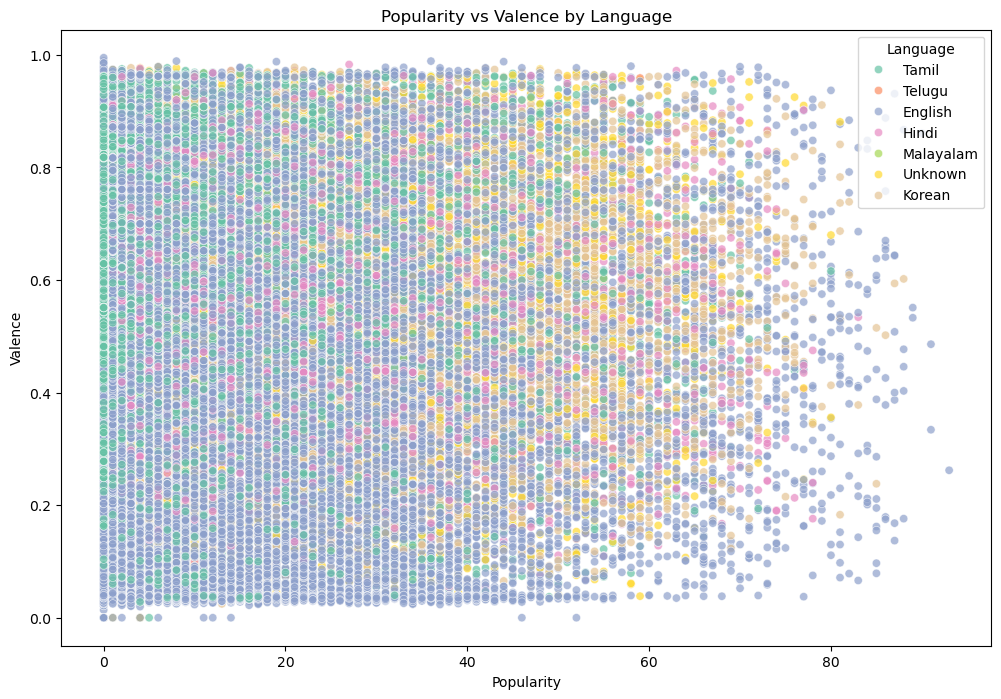

In [6]:
# 可视化不同语言的流行度与情绪（valence）关系
plt.figure(figsize=(12, 8))
sns.scatterplot(x='popularity', y='valence', hue='language', data=df, palette='Set2', alpha=0.7)
plt.title('Popularity vs Valence by Language')
plt.xlabel('Popularity')
plt.ylabel('Valence')
plt.legend(title='Language')
plt.show()

## 3.3 不同年份的音频特征趋势

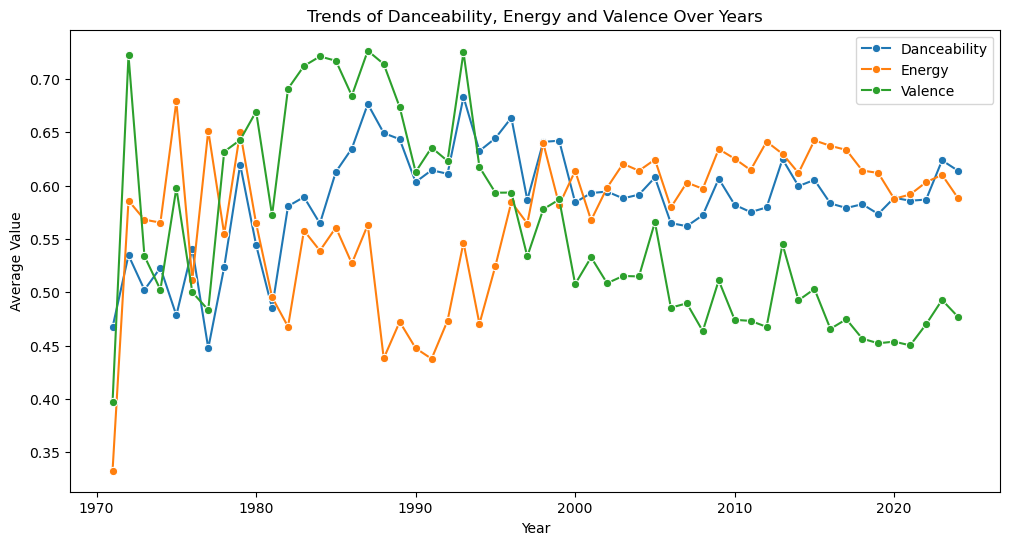

In [7]:
# 按年份查看舞蹈性、能量和情绪（valence）的平均值
df_yearly = df.groupby('year')[['danceability', 'energy', 'valence']].mean().reset_index()

# 可视化不同年份音频特征的变化趋势
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='danceability', data=df_yearly, label='Danceability', marker='o')
sns.lineplot(x='year', y='energy', data=df_yearly, label='Energy', marker='o')
sns.lineplot(x='year', y='valence', data=df_yearly, label='Valence', marker='o')
plt.title('Trends of Danceability, Energy and Valence Over Years')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend()
plt.show()